## Model for the Gender classification problem

### Extract and label the dataset

In [1]:
import os
import tensorflow as tf
from keras.preprocessing.image import img_to_array, load_img

def extract_dataset(main_folder, image_size=(128, 128)):
    dataset = []
    labels = []

    # Assuming you have 'Female' and 'Male' subfolders inside the main folder
    for gender in ['Female', 'Male']:
        gender_folder = os.path.join(main_folder, gender)
        label = 0 if gender == 'Female' else 1

        # Loop through images in the gender subfolder
        for filename in os.listdir(gender_folder):
            if filename.endswith(('.jpg', '.jpeg', '.png', '.JPG')):  # Add more image formats if needed
                image_path = os.path.join(gender_folder, filename)

                # Load the image using TensorFlow and convert to grayscale
                img = load_img(image_path, color_mode='grayscale', target_size=image_size)
                img_array = img_to_array(img)

                # Normalize the pixel values to the range [0, 1]
                img_array /= 255.0

                # Append the image data and label to the dataset
                dataset.append(img_array)
                labels.append(label)



    return dataset, labels


In [2]:
data_path = './Augmentation/'
dataset, labels = extract_dataset(data_path)

In [3]:
print(len(dataset))
print(dataset[0][0].shape)
print(dataset[0][0])

5000
(128, 1)
[[0.2       ]
 [0.11764706]
 [0.05490196]
 [0.08627451]
 [0.10588235]
 [0.12156863]
 [0.08627451]
 [0.15294118]
 [0.24705882]
 [0.30980393]
 [0.3372549 ]
 [0.43137255]
 [0.41568628]
 [0.4627451 ]
 [0.5254902 ]
 [0.52156866]
 [0.5176471 ]
 [0.5294118 ]
 [0.53333336]
 [0.53333336]
 [0.53333336]
 [0.5372549 ]
 [0.5372549 ]
 [0.5372549 ]
 [0.54509807]
 [0.54509807]
 [0.54509807]
 [0.54901963]
 [0.54509807]
 [0.5411765 ]
 [0.54509807]
 [0.5529412 ]
 [0.5372549 ]
 [0.5568628 ]
 [0.56078434]
 [0.54509807]
 [0.5686275 ]
 [0.57254905]
 [0.5803922 ]
 [0.5803922 ]
 [0.5882353 ]
 [0.5803922 ]
 [0.5882353 ]
 [0.60784316]
 [0.6156863 ]
 [0.60784316]
 [0.6117647 ]
 [0.627451  ]
 [0.60784316]
 [0.6156863 ]
 [0.60784316]
 [0.6117647 ]
 [0.58431375]
 [0.5882353 ]
 [0.59607846]
 [0.6       ]
 [0.59607846]
 [0.59607846]
 [0.6       ]
 [0.58431375]
 [0.5882353 ]
 [0.5803922 ]
 [0.58431375]
 [0.57254905]
 [0.5764706 ]
 [0.5647059 ]
 [0.5882353 ]
 [0.5803922 ]
 [0.5803922 ]
 [0.5882353 ]
 [0.6 

In [4]:
print(len(labels))
print(labels)

5000
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np


In [8]:
# Define the VGGNet16 model
def create_vggnet16_model(input_shape=(128, 128, 1)):
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    # Output layer
    model.add(Dense(2, activation='softmax'))
    model.summary()
    return model

In [9]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    
    # Get unique classes from the data
    unique_classes = np.unique(np.concatenate([y_true, y_pred]))

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap='Blues', values_format='d')

    # Update tick locations based on unique classes
    plt.xticks(np.arange(len(unique_classes)), unique_classes, rotation=45)
    plt.yticks(np.arange(len(unique_classes)), unique_classes)
    
    plt.show()


In [10]:
def train_vgg(dataset, labels, learning_rate=0.001, batch_size=32, test_size=0.2, epochs=10, patience=3):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=test_size, random_state=42)

    # Create and compile the VGGNet16 model
    model = create_vggnet16_model()
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Define early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Print test loss, test accuracy, train loss, train accuracy
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    train_loss, train_accuracy = model.evaluate(X_train, y_train)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

    # Plot train loss and validation loss over epochs
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Predict on test set
    y_pred = model.predict(X_test)

    # Convert predictions to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Get class names
    class_names = ['Female', 'Male']

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes, target_names=class_names))
    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred_classes, classes=class_names)

    return model

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_137 (Conv2D)         (None, 128, 128, 64)      640       
                                                                 
 conv2d_138 (Conv2D)         (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_59 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_139 (Conv2D)         (None, 64, 64, 128)       73856     
                                                                 
 conv2d_140 (Conv2D)         (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 32, 32, 128)       0         
 ng2D)                                               

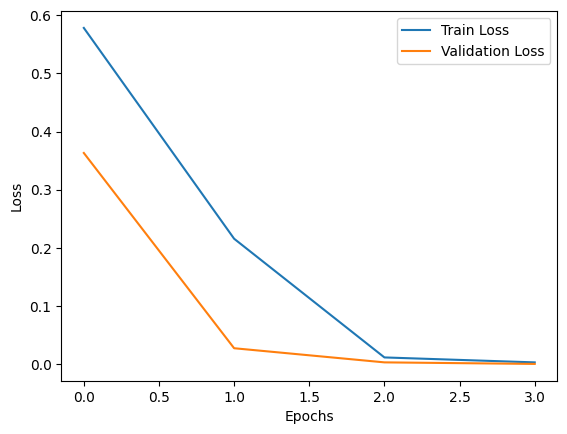

32/32 [==============================] - 16s 495ms/step
Classification Report:
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00       500
        Male       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



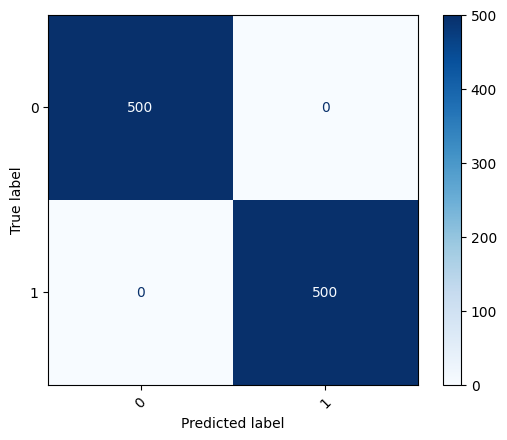

C:\Users\Mahmoud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
# Final Model (proper augmentation) Class_num = 2500 , total subjects 5000  
dataset = np.array(dataset)
labels = np.array(labels)

model = train_vgg(dataset, labels, learning_rate=0.0001, batch_size=128, test_size=0.2, epochs=4, patience=2)

model.save('gender4.h5')

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126 (Conv2D)         (None, 128, 128, 64)      640       
                                                                 
 conv2d_127 (Conv2D)         (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_128 (Conv2D)         (None, 64, 64, 128)       73856     
                                                                 
 conv2d_129 (Conv2D)         (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 32, 32, 128)       0         
 ng2D)                                               

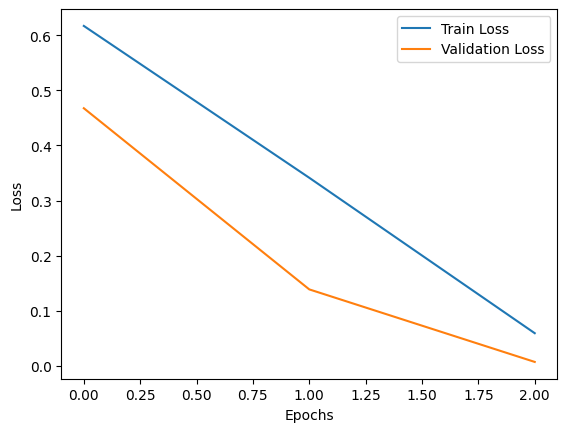

32/32 [==============================] - 15s 479ms/step
Classification Report:
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00       500
        Male       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



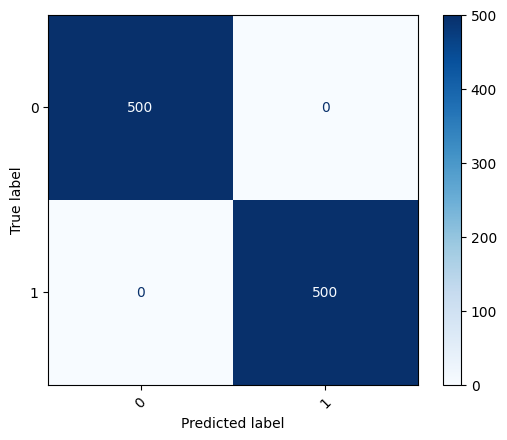

C:\Users\Mahmoud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
# Final Model (proper augmentation) Class_num = 2500 , total subjects 5000  
dataset = np.array(dataset)
labels = np.array(labels)

model = train_vgg(dataset, labels, learning_rate=0.0001, batch_size=128, test_size=0.2, epochs=4, patience=2)

model.save('gender3.h5')

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 conv2d_92 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_93 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 conv2d_94 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 32, 32, 128)       0         
 ng2D)                                               

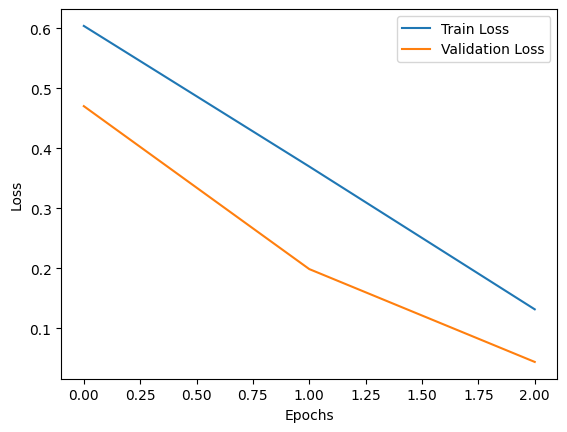

32/32 [==============================] - 15s 479ms/step


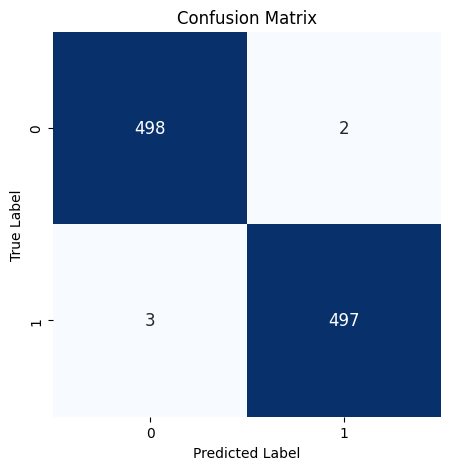

C:\Users\Mahmoud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
# Final Model (proper augmentation) Class_num = 2500 , total subjects 5000  
dataset = np.array(dataset)
labels = np.array(labels)

model = train_vgg(dataset, labels, learning_rate=0.0001, batch_size=128, test_size=0.2, epochs=3, patience=2)

model.save('gender2.h5')

Epoch 1/10
22/22 [==============================] - 110s 5s/step - loss: 0.7618 - accuracy: 0.4943 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/10
22/22 [==============================] - 97s 4s/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
22/22 [==============================] - 96s 4s/step - loss: 0.6412 - accuracy: 0.5971 - val_loss: 0.4967 - val_accuracy: 0.6933
Epoch 4/10
22/22 [==============================] - 95s 4s/step - loss: 0.5220 - accuracy: 0.7471 - val_loss: 0.5369 - val_accuracy: 0.7100
Epoch 5/10
22/22 [==============================] - 96s 4s/step - loss: 0.4921 - accuracy: 0.7329 - val_loss: 0.5111 - val_accuracy: 0.6900
Epoch 6/10
22/22 [==============================] - 97s 4s/step - loss: 0.3819 - accuracy: 0.8029 - val_loss: 0.4080 - val_accuracy: 0.7767
Epoch 7/10
22/22 [==============================] - 97s 4s/step - loss: 0.3562 - accuracy: 0.8257 - val_loss: 0.2846 - val_accuracy: 0.9000
Epoch 8/10
22/22 [=

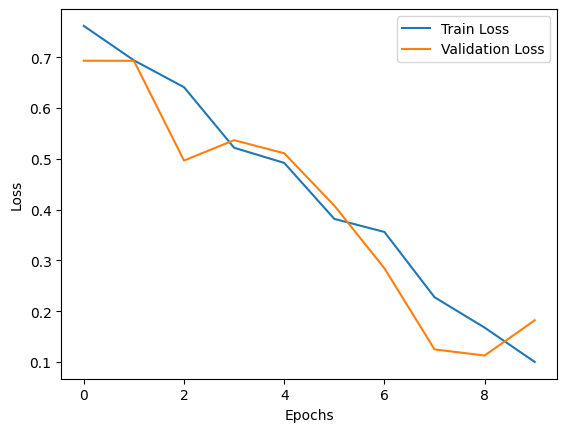

10/10 [==============================] - 6s 567ms/step


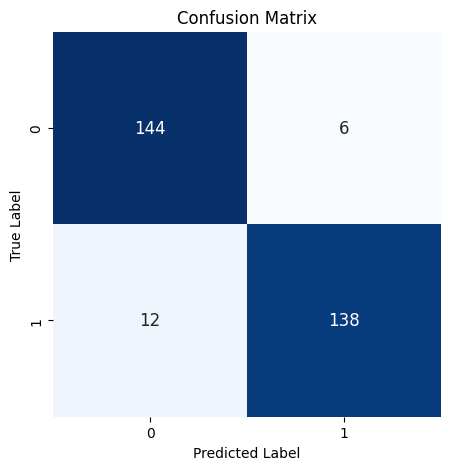

C:\Users\Mahmoud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [107]:
# 0.3
dataset = np.array(dataset)
labels = np.array(labels)

model = train_vgg(dataset, labels, learning_rate=0.001, batch_size=32, test_size=0.3, epochs=10, patience=3)


Epoch 1/10
19/19 [==============================] - 91s 5s/step - loss: 0.7270 - accuracy: 0.4700 - val_loss: 0.6950 - val_accuracy: 0.4800
Epoch 2/10
19/19 [==============================] - 85s 5s/step - loss: 0.6942 - accuracy: 0.5133 - val_loss: 0.6979 - val_accuracy: 0.4800
Epoch 3/10
19/19 [==============================] - 85s 5s/step - loss: 0.6928 - accuracy: 0.5133 - val_loss: 0.6947 - val_accuracy: 0.4800
Epoch 4/10
19/19 [==============================] - 85s 5s/step - loss: 0.8142 - accuracy: 0.5250 - val_loss: 0.6976 - val_accuracy: 0.4800
Epoch 5/10
19/19 [==============================] - 86s 5s/step - loss: 0.6938 - accuracy: 0.5133 - val_loss: 0.6948 - val_accuracy: 0.4800
Epoch 6/10
19/19 [==============================] - 11s 585ms/step - loss: 0.6928 - accuracy: 0.5133
Test Loss: 0.6947, Test Accuracy: 0.4800
Train Loss: 0.6928, Train Accuracy: 0.5133


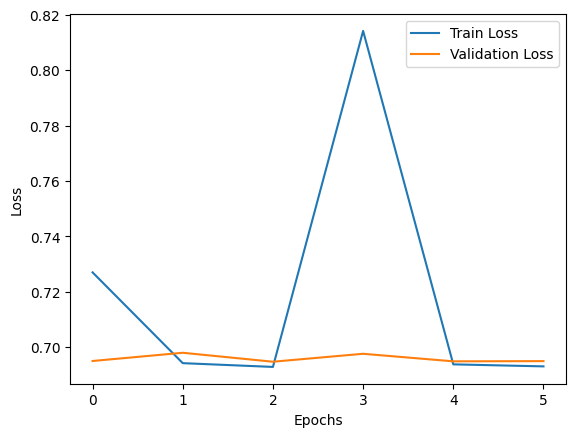

13/13 [==============================] - 8s 581ms/step


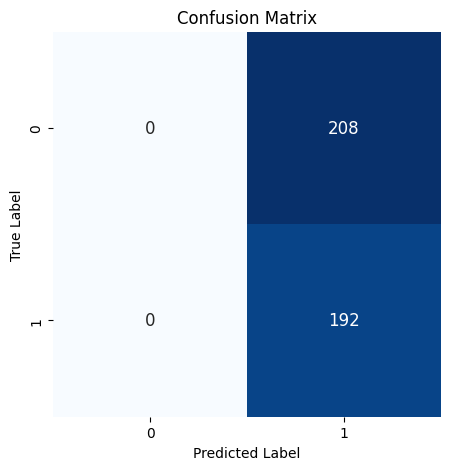

C:\Users\Mahmoud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [108]:
# 0.4
dataset = np.array(dataset)
labels = np.array(labels)

model = train_vgg(dataset, labels, learning_rate=0.001, batch_size=32, test_size=0.4, epochs=10, patience=3)


In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def train_kvgg(dataset, labels, learning_rate=0.001, batch_size=32, n_folds=5, epochs=10, patience=3):
    # Create and compile the VGGNet16 model
    model = create_vggnet16_model()
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Define early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

    # Initialize StratifiedKFold
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Lists to store results from each fold
    test_losses, test_accuracies = [], []
    train_losses, train_accuracies = [], []
    all_y_test, all_y_pred_classes = [], []
    histories = []  # List to store training histories

    # K-fold cross-validation loop
    for fold, (train_index, test_index) in enumerate(skf.split(dataset, labels)):
        X_train, X_test = dataset[train_index], dataset[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        # Train the model for this fold
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

        # Store the training history for this fold
        histories.append(history)

        # Evaluate the model on the test set for this fold
        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        # Evaluate the model on the train set for this fold
        train_loss, train_accuracy = model.evaluate(X_train, y_train)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Store true and predicted values for the final confusion matrix
        y_pred = model.predict(X_test)
        y_pred_classes = (y_pred > 0.5).astype("int32")
        all_y_test.extend(y_test)
        all_y_pred_classes.extend(y_pred_classes)

    # Print average test loss, test accuracy, train loss, and train accuracy across folds
    avg_test_loss = np.mean(test_losses)
    avg_test_accuracy = np.mean(test_accuracies)
    avg_train_loss = np.mean(train_losses)
    avg_train_accuracy = np.mean(train_accuracies)
    print(f"Average Test Loss: {avg_test_loss:.4f}, Average Test Accuracy: {avg_test_accuracy:.4f}")
    print(f"Average Train Loss: {avg_train_loss:.4f}, Average Train Accuracy: {avg_train_accuracy:.4f}")

    # Plot confusion matrix for all folds
    final_confusion_matrix = confusion_matrix(all_y_test, all_y_pred_classes)
    plt.figure(figsize=(5, 5))
    sns.heatmap(final_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 12})
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Final Confusion Matrix")
    plt.show()
    return model


Epoch 1/10
25/25 [==============================] - 120s 5s/step - loss: 0.9000 - accuracy: 0.5600 - val_loss: 0.8107 - val_accuracy: 0.4050
Epoch 2/10
25/25 [==============================] - 107s 4s/step - loss: 0.5166 - accuracy: 0.6875 - val_loss: 0.4868 - val_accuracy: 0.7200
Epoch 3/10
25/25 [==============================] - 107s 4s/step - loss: 0.3965 - accuracy: 0.7862 - val_loss: 0.3452 - val_accuracy: 0.8100
Epoch 4/10
25/25 [==============================] - 106s 4s/step - loss: 0.3092 - accuracy: 0.8662 - val_loss: 0.3294 - val_accuracy: 0.8750
Epoch 5/10
25/25 [==============================] - 106s 4s/step - loss: 0.5208 - accuracy: 0.7650 - val_loss: 0.5254 - val_accuracy: 0.7250
Epoch 6/10
25/25 [==============================] - 106s 4s/step - loss: 0.4716 - accuracy: 0.7550 - val_loss: 0.5420 - val_accuracy: 0.6800
Epoch 7/10
7/7 [==============================] - 4s 519ms/step
Epoch 1/10
25/25 [==============================] - 105s 4s/step - loss: 0.2454 - accuracy

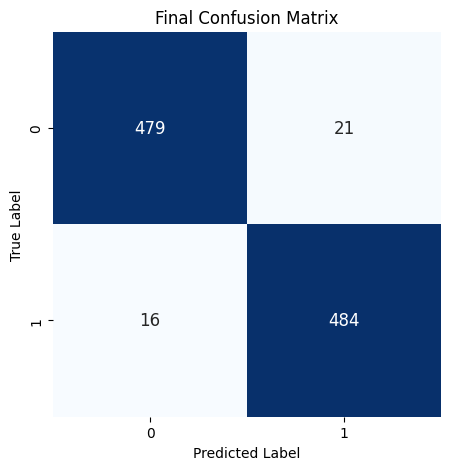

C:\Users\Mahmoud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
# Kfold = 5 data = 1000
dataset = np.array(dataset)
labels = np.array(labels)

model = train_kvgg(dataset, labels, learning_rate=0.001, batch_size=32,n_folds= 5, epochs=10, patience=3)


Epoch 1/10
50/50 [==============================] - 219s 4s/step - loss: 0.9776 - accuracy: 0.5131 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 214s 4s/step - loss: 0.5521 - accuracy: 0.6712 - val_loss: 0.3878 - val_accuracy: 0.7950
Epoch 3/10
50/50 [==============================] - 215s 4s/step - loss: 0.2684 - accuracy: 0.8637 - val_loss: 0.1734 - val_accuracy: 0.9450
Epoch 4/10
50/50 [==============================] - 214s 4s/step - loss: 0.1495 - accuracy: 0.9431 - val_loss: 0.1339 - val_accuracy: 0.9550
Epoch 5/10
50/50 [==============================] - 212s 4s/step - loss: 0.1090 - accuracy: 0.9619 - val_loss: 0.4700 - val_accuracy: 0.8125
Epoch 6/10
50/50 [==============================] - 221s 4s/step - loss: 0.1839 - accuracy: 0.9200 - val_loss: 0.0982 - val_accuracy: 0.9600
Epoch 7/10
50/50 [==============================] - 215s 4s/step - loss: 0.0302 - accuracy: 0.9887 - val_loss: 0.0409 - val_accuracy: 0.9925
Epoch 8/10
50

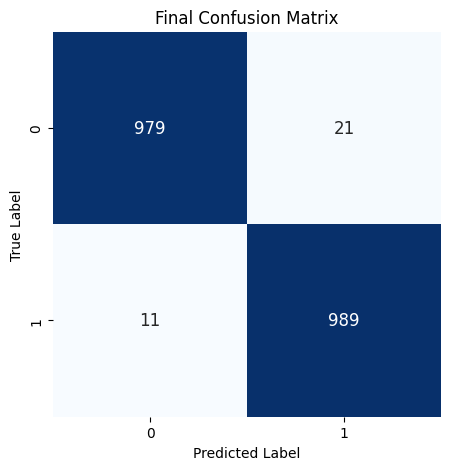

C:\Users\Mahmoud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# Kfold = 5 data = 2000
dataset = np.array(dataset)
labels = np.array(labels)

model = train_kvgg(dataset, labels, learning_rate=0.001, batch_size=32,n_folds= 5, epochs=10, patience=3)


Epoch 1/10
50/50 [==============================] - 231s 5s/step - loss: 0.7588 - accuracy: 0.5888 - val_loss: 0.5499 - val_accuracy: 0.7075
Epoch 2/10
50/50 [==============================] - 221s 4s/step - loss: 0.4104 - accuracy: 0.7869 - val_loss: 0.4281 - val_accuracy: 0.8325
Epoch 3/10
50/50 [==============================] - 215s 4s/step - loss: 0.2619 - accuracy: 0.8800 - val_loss: 0.2808 - val_accuracy: 0.8900
Epoch 4/10
50/50 [==============================] - 213s 4s/step - loss: 0.1393 - accuracy: 0.9469 - val_loss: 0.1331 - val_accuracy: 0.9450
Epoch 5/10
50/50 [==============================] - 212s 4s/step - loss: 0.1108 - accuracy: 0.9519 - val_loss: 0.1377 - val_accuracy: 0.9375
Epoch 6/10
50/50 [==============================] - 211s 4s/step - loss: 0.0795 - accuracy: 0.9688 - val_loss: 0.1796 - val_accuracy: 0.9600
Epoch 7/10
50/50 [==============================] - 212s 4s/step - loss: 0.0685 - accuracy: 0.9775 - val_loss: 0.0740 - val_accuracy: 0.9925
Epoch 8/10
50

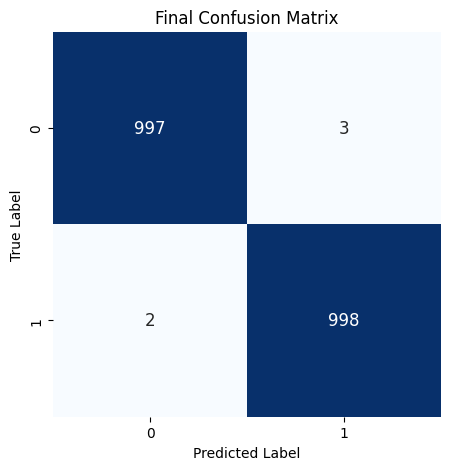

C:\Users\Mahmoud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
# Kfold = 5 data = 2000 increased number of female subjects :) 
dataset = np.array(dataset)
labels = np.array(labels)

model = train_kvgg(dataset, labels, learning_rate=0.001, batch_size=32,n_folds= 5, epochs=10, patience=3)


Epoch 1/5
125/125 [==============================] - 557s 4s/step - loss: 0.5671 - accuracy: 0.6482 - val_loss: 0.2896 - val_accuracy: 0.8480
Epoch 2/5
125/125 [==============================] - 541s 4s/step - loss: 0.2247 - accuracy: 0.9035 - val_loss: 0.1024 - val_accuracy: 0.9620
Epoch 3/5
125/125 [==============================] - 543s 4s/step - loss: 0.1192 - accuracy: 0.9553 - val_loss: 0.0572 - val_accuracy: 0.9760
Epoch 4/5
125/125 [==============================] - 542s 4s/step - loss: 0.1135 - accuracy: 0.9628 - val_loss: 0.0335 - val_accuracy: 0.9890
Epoch 5/5
125/125 [==============================] - 76s 609ms/step - loss: 0.0218 - accuracy: 0.9925
Test Loss: 0.0216, Test Accuracy: 0.9920
Train Loss: 0.0218, Train Accuracy: 0.9925


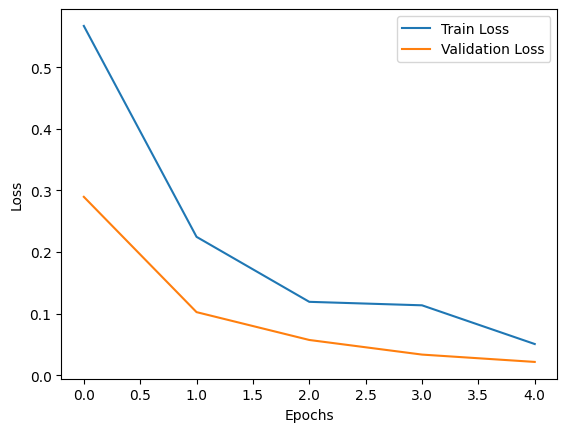

32/32 [==============================] - 19s 598ms/step


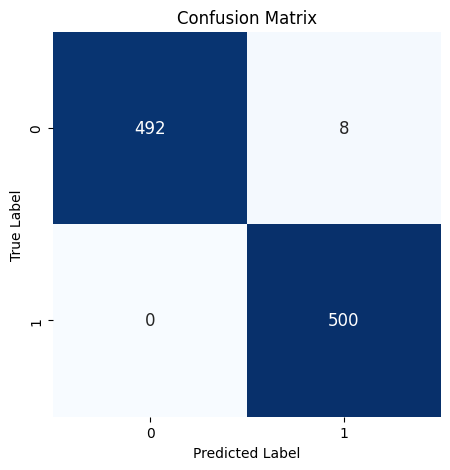

C:\Users\Mahmoud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
#  Model Class_num = 2500 , total subjects 5000 
dataset = np.array(dataset)
labels = np.array(labels)

model = train_vgg(dataset, labels, learning_rate=0.001, batch_size=32, test_size=0.2, epochs=5, patience=2)


Epoch 1/5
125/125 [==============================] - 542s 4s/step - loss: 0.4749 - accuracy: 0.7442 - val_loss: 0.2188 - val_accuracy: 0.9150
Epoch 2/5
125/125 [==============================] - 525s 4s/step - loss: 0.1929 - accuracy: 0.9208 - val_loss: 0.1080 - val_accuracy: 0.9580
Epoch 3/5
125/125 [==============================] - 524s 4s/step - loss: 0.1036 - accuracy: 0.9597 - val_loss: 0.0796 - val_accuracy: 0.9770
Epoch 4/5
125/125 [==============================] - 524s 4s/step - loss: 0.0481 - accuracy: 0.9827 - val_loss: 0.0390 - val_accuracy: 0.9890
Epoch 5/5
125/125 [==============================] - 74s 592ms/step - loss: 0.0092 - accuracy: 0.9990
Test Loss: 0.0262, Test Accuracy: 0.9940
Train Loss: 0.0092, Train Accuracy: 0.9990


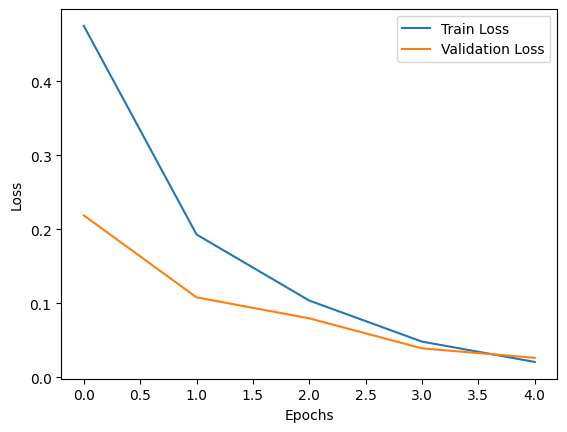

32/32 [==============================] - 19s 586ms/step


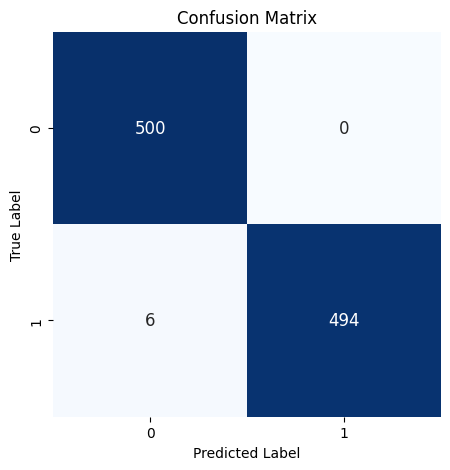

In [16]:
# Final Model (proper augmentation) Class_num = 2500 , total subjects 5000  
dataset = np.array(dataset)
labels = np.array(labels)

model = train_vgg(dataset, labels, learning_rate=0.0001, batch_size=32, test_size=0.2, epochs=5, patience=2)

In [17]:
model.save('model.h5')

C:\Users\Mahmoud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
